# Домашнее задание (10 баллов)

1. (2 балла) Закончить реализацию `ClassificationDecisionTree` в decision_tree (реализовать feature_importance_, проверить корректность predict) и `RandomForestClassifier` в random_forest (predict/predict_proba). Обратите внимение, что в random_forest в качестве `base_estimator` предполагается использовать `DecisionTreeClassifier` из sklearn, использовать вашу реализацию решающего дерева необязательно. <br> Запуск тестов 
- `python -m unittest discover sem_dt_rf/decision_tree/tests`
- `python -m unittest discover sem_dt_rf/random_forest/tests`
 

2. (1 балл) Для регрессионного дерева необходимо использовать такой критерий:
    $$H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$
    
    Докажите, что минимум H(R) достигается при $c$:

    $$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$

## Решение  
Для нахождения минимума найдем первую производную приравняем к нулю, затем вторую и посмотрим на ее знак  
1) $H'_c(R) = -\frac{2}{|R|} \sum (y_i - c) = 0 $  
   $ \sum y_i - |R| * c  = 0$ так как количества вычитаний $c$ равно количеству элементов в R  
   $c = \frac{1}{|R|} \sum y_i$
2) $H''_c = \frac{2}{|R|} * |R| = 2 > 0$ - следовательно на шаге 1 получили минимум

3. (3 балла) Реализуйте регрессионное дерево. В качестве критерия необходимо использовать критерий, определённый в пункте 2. В качестве функции выдачи результатов необходимо использовать среднее значение ответов по всем объектам в листе.

    Сгенерируйте однопризнаковую выборку для тестирования дерева и покажите работу дерева на этой выборке (пример см. ниже, можно использовать свою версию). Отобразите на одном графике значения алгоритма и точки. Что меняется при изменении параметра глубины? Сделайте выводы.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sem_dt_rf.decision_tree.decision_tree import RegressionDecisionTree
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
%matplotlib inline

In [142]:
# generate example
x_shape = 300
# features for fit 
x = np.arange(x_shape) / 100
# features for test the fitted model
x_test = np.random.uniform(0, 3.0, 300)#np.arange(x_shape) / 100#np.random.uniform(0, 3, 300)
# values for fit
y = x**3 * np.sin(x**3) + (np.random.random(x_shape)*2 - 1)  * 3 
#values with the correct dependence on x (without error)
y_true_func = x_test**3 * np.sin(x_test**3)

### Регрессионое дерево
* Реализовано в виде отдельного класса RegressionDecisionTree в файле **decision_tree.py**.  
* Визуализация зависимости от **max_depth**  
  График ниже состоит из 4 рисунков для каждого значения глубины дерева. *train* и *test* графики соотвествуют, результатам предсказания реализованного регрессионого дерева. На графике *train* представлено сравнение предсказаний с набором данных **x, y**, на которых обучалось дерево. На графике *test*, представлено сравнение значений предсказаний модели на сгенерированном датасете **x_test**, в котором x расположен случайным образом, а не равномерным на отрезке [0,3], и идеальных значений y : $y = x^3 + sin(x^3)$ (значений без шума, то есть только нужная зависимость). Таким образом график **test** показывает насколько модель уловила искомую зависимость, и присутсвует ли в модели переобучение, которое проявляется, засчет копирования шума из обучающего датасета **x**.  
  Для сравнения корректности написанной модели и правильного регрессионого дерева, оставшиеся графики *sklearn train* и *sklearn test* показывают теже величины, что описаны выше, но для модели DecisionTreeRegressor из бибилотеки sklearn

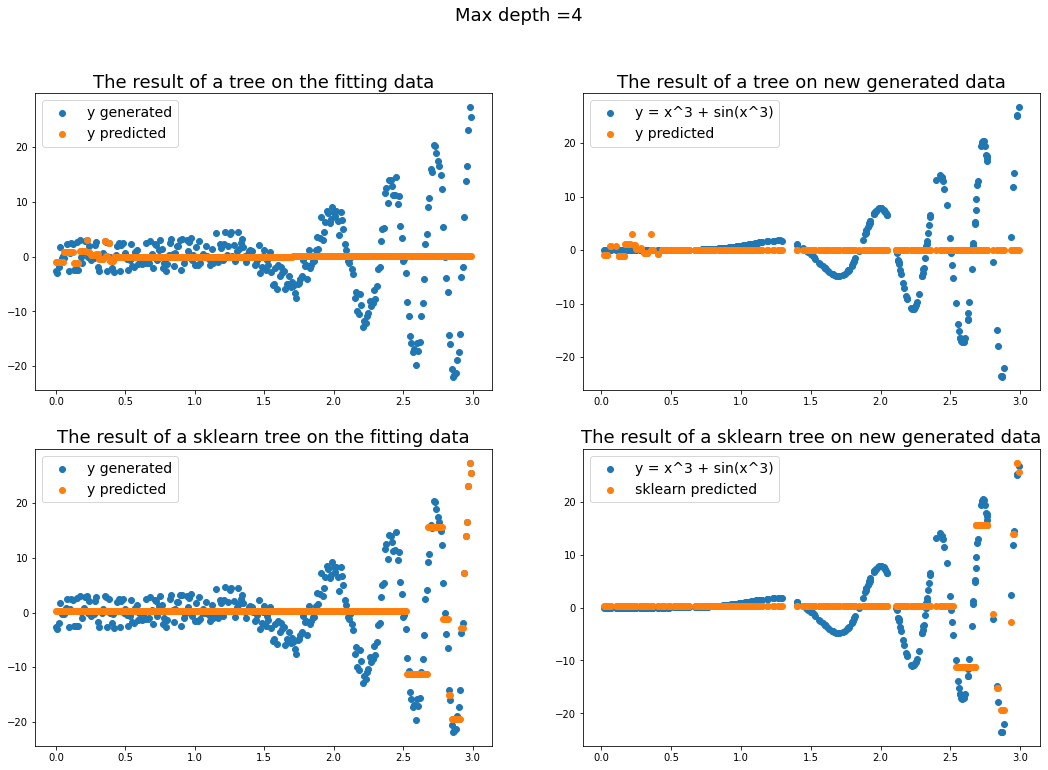

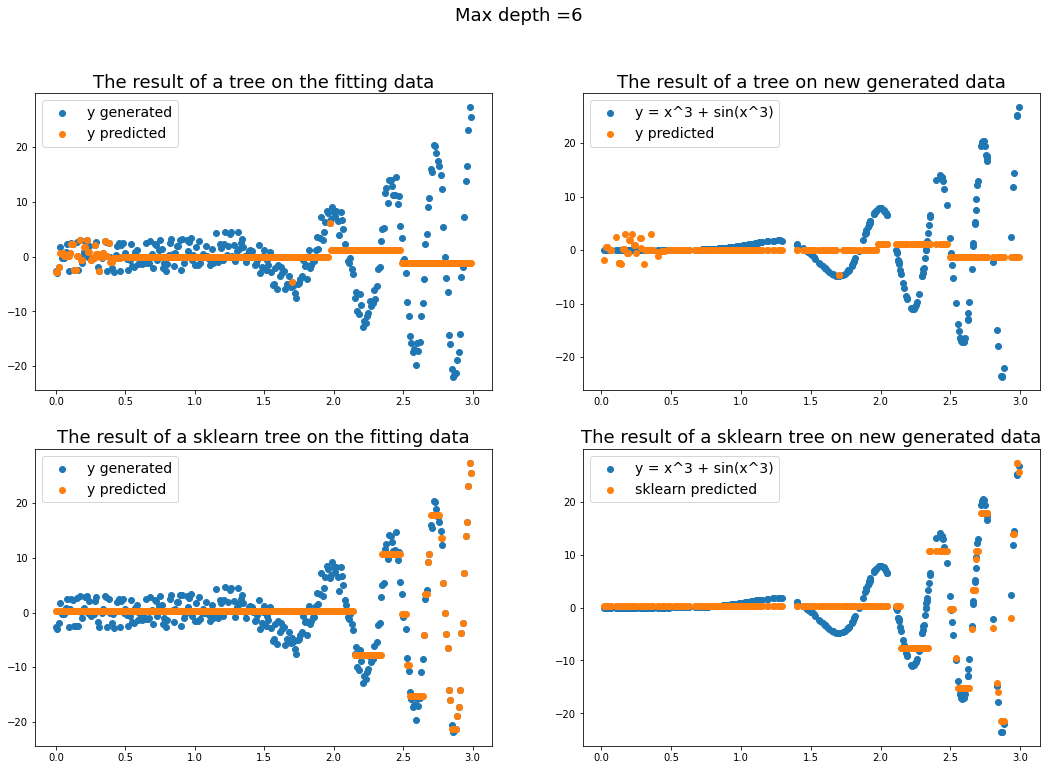

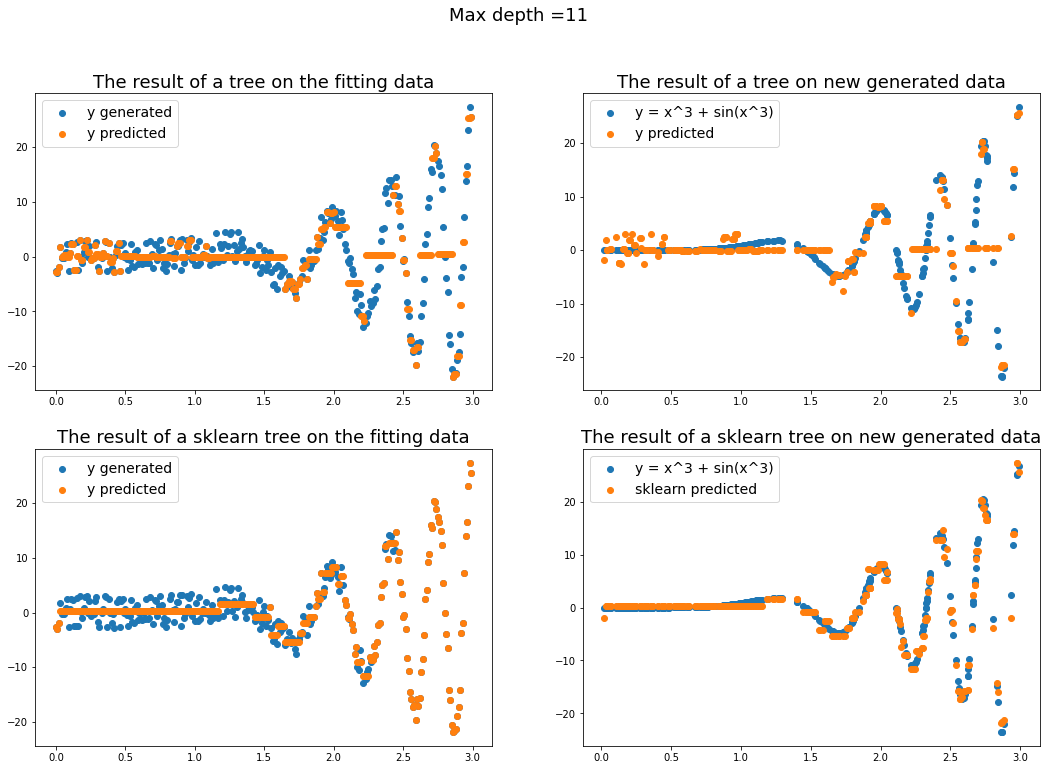

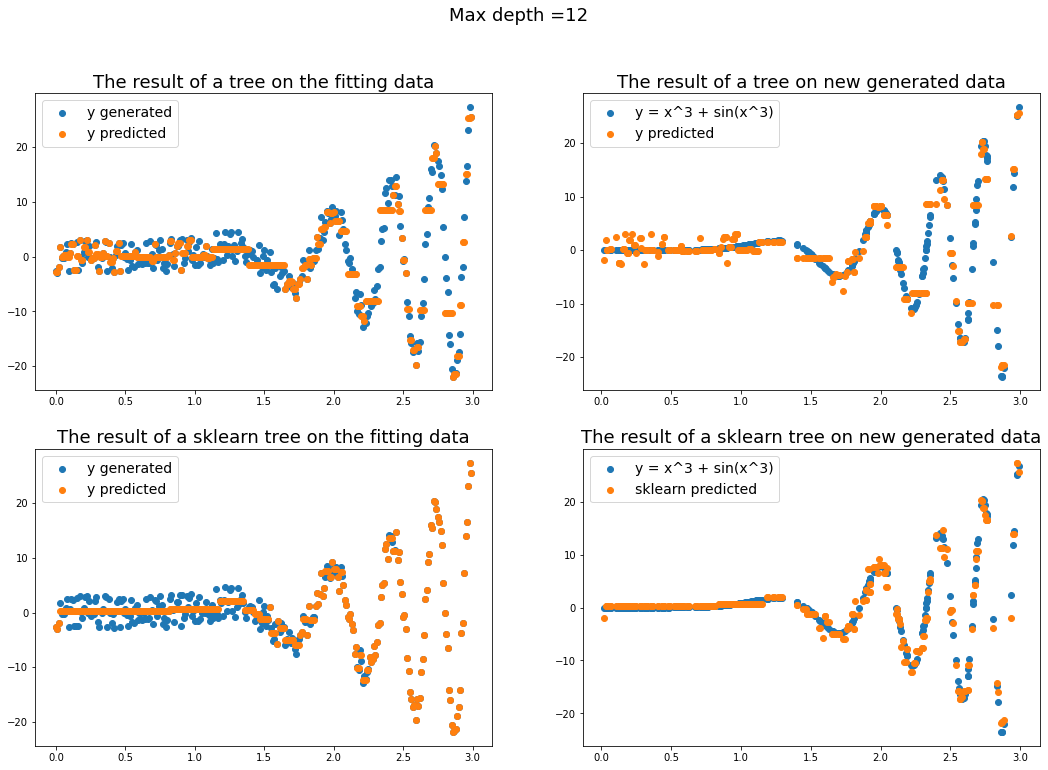

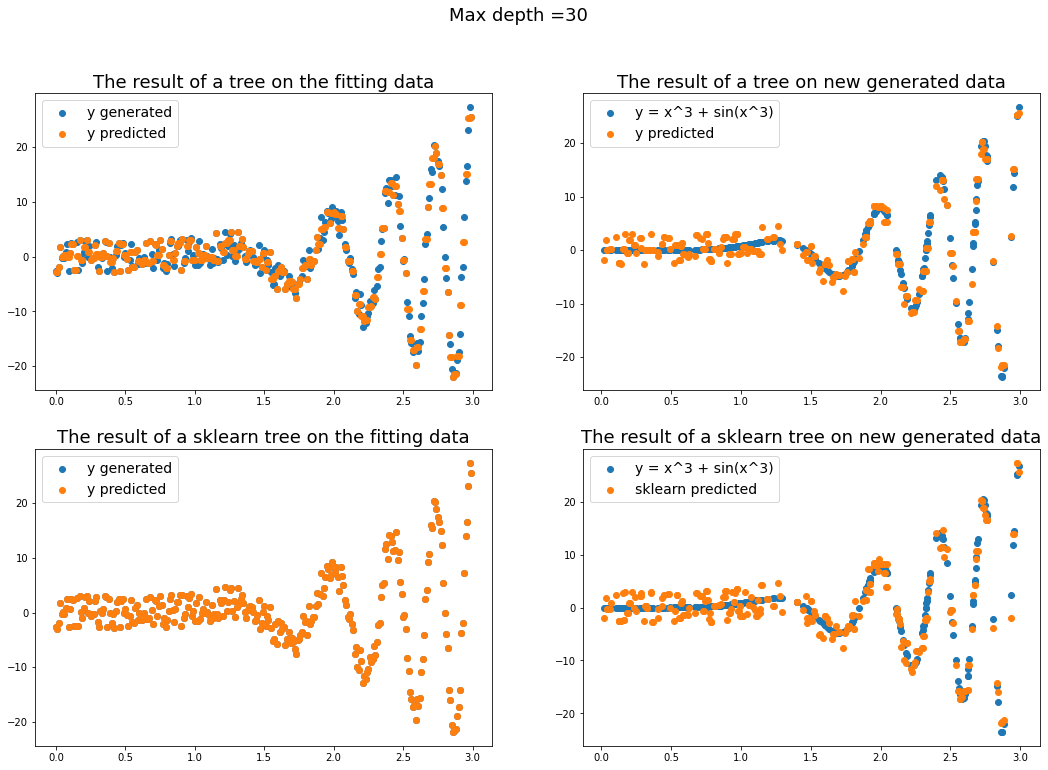

In [155]:
for i in [4,6,11,12, 30]:
    max_depth = i
    reg_tree = RegressionDecisionTree(max_depth=max_depth, min_leaf_size = 2) 
    reg_tree.fit(x.reshape((-1,1)), y)
    
    skl = DecisionTreeRegressor(max_depth = max_depth)
    skl.fit(x.reshape((-1,1)), y)
    y_pred = reg_tree.predict(x.reshape((-1,1)))
    y_test = reg_tree.predict(x_test.reshape((-1,1)))
    skl_pred = skl.predict(x.reshape((-1,1)))
    skl_test = skl.predict(x_test.reshape((-1,1)))

    fig, ax = plt.subplot_mosaic([['train', 'test'],['sklearn train', 'sklearn test']])
    fig.set_size_inches(18, 12)
    fig.suptitle(f'Max depth ={i} ', fontsize=18)
    
    ax['train'].scatter(x, y, label='y generated')
    ax['train'].scatter(x,y_pred, label = 'y predicted')
    ax['train'].legend(fontsize=14)
    ax['train'].set_title('The result of a tree on the fitting data', fontsize=18)

    ax['test'].scatter(x_test, y_true_func, label='y = x^3 + sin(x^3)')
    ax['test'].scatter(x_test, y_test, label='y predicted')
    ax['test'].legend(fontsize=14)
    ax['test'].set_title('The result of a tree on new generated data', fontsize=18)

    ax['sklearn train'].scatter(x, y, label='y generated')
    ax['sklearn train'].scatter(x,skl_pred, label = 'y predicted')
    ax['sklearn train'].legend(fontsize=14)
    ax['sklearn train'].set_title('The result of a sklearn tree on the fitting data', fontsize=18)

    ax['sklearn test'].scatter(x_test, y_true_func, label='y = x^3 + sin(x^3)')
    ax['sklearn test'].scatter(x_test, skl_test, label = 'sklearn predicted')
    ax['sklearn test'].legend(fontsize=14)
    ax['sklearn test'].set_title('The result of a sklearn tree on new generated data', fontsize=18)


    
    
    plt.show()

## Выводы  
**Что ожидаем увидеть?**  
При малых значениях глубины модель не дообчается и плохо фитирует искомую зависимость  
При слишком больших значениях глубины модель переобучается и фитирует все точки, стараясь описать шум.  
**Что видим**  
Далее будем смотреть только на графики *train* и *test*, показывающие результат для реализованной модели.  
* Начиная с небольших глубин (max_depth = 4) видим, что модели не дообучена
* На max_depth = 6 появляются ступеньки, но еще слишком широкие
* max_depth = 11, max_depth = 12, модель уловила основную зависимость, несмотря на небольшие недочеты (отдельные ступеньки x = [1.2 , 1.7])
* max_depth = 30, переобучение, слишком большое дерево, на графике *test* видим, что хотя все точки идеально ложатся на кривую, они копируют шум, которого нет в исходной зависимости. (широкая полоса оранжевых точек)  
**Вывод**  
  Глубина должна быть не слишком большой, для избежания переобучения, но и не слишком малой, чтобы глубины дерева хватило для нахождения основной зависимости.

4. (4 балла) Протестируйте различные реализации `random_forest` на `fetch_covtype` датасете (можно загрузить с помощью `sklearn.datasets.fetch_covtype`). Возможно, поможет ноутбук с семинара `ensembles_seminar.ipynb`. Для честного сравнения старайтесь использовать похожий набор гиперпараметров.
- ваша реализация (import `RandomForestClassifier as MyRandomForestClassifier` ниже)
- sklearn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- lightgbm https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMModel.html см. параметр `boosting_type`
- xgboost https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

    Что нужно сделать: 
- Разбейте данные на train и test. 
- Оцените качество алгоритмов по метрике (balanced_accuracy_score)[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html]
- Оцените время работы `train` и `predict`
- Сделайте выводы

In [1]:
import sys
sys.path.extend(['/Users/alkrasnov/Documents/AM_ML_2_24']) # change your path

In [2]:
from sem_dt_rf.random_forest.random_forest import RandomForestClassifier as MyRandomForestClassifier

In [3]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

In [4]:
cov_type = fetch_covtype()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(...)

NameError: name 'a' is not defined